<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205/ClassicalMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Linear regression.

We illustrate linear regression with the classical Boston house price dataset

In [ ]:
from sklearn.datasets import load_boston

# Load in the dataset
ds = load_boston()

This will load in the data as a dictionary. The keys of the dictionary are as follows:



In [ ]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Description of the dataset:

In [ ]:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now convert the data into a pandas DataFrame:

In [ ]:
df = pd.DataFrame(ds.data)
df.columns = ds.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


As the price to be predicted is stored in the `ds.target` variable, we need to add it to our DataFrame:

In [ ]:
df['Price'] = ds.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now lets plot a heat map of the data correlation:

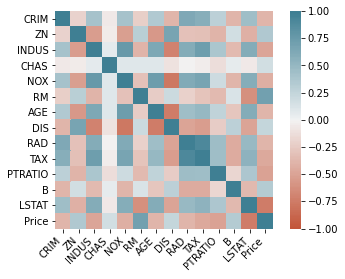

In [ ]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There is a quite strong positive correlation between the Nr. of rooms and the price of the house, so let's explore this:

In [ ]:
rooms = df['RM']
price = df['Price']

Text(0, 0.5, 'Price of house')

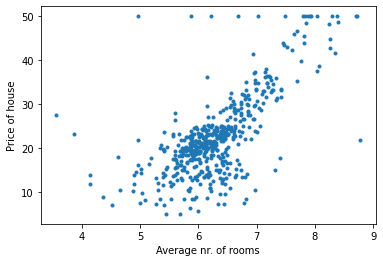

In [ ]:
plt.plot(rooms, price,'.')
plt.xlabel('Average nr. of rooms')
plt.ylabel('Price of house')

Let's do simple univariate linear regression on this:

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

`LinearRegression` expects two-dimensional inputs (i.e. regression with more than one feature), that is, we have to add one extra dimension to our data:

In [ ]:
rooms = np.expand_dims(rooms, axis=1)

First we have to split the data into training and test data (e.g. 80% to 20%):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rooms, price, test_size=0.2)

In [ ]:
# This is the linear regression object
univariate_linear_model = linear_model.LinearRegression() 

# Train the model 
univariate_linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we can evaluate the model on the test data and make predictions

In [ ]:
# Make predictions and evaluate the scores
y_pred = univariate_linear_model.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 37.72
Coefficient of determination: 0.55


And plot the results:

Text(0, 0.5, 'Price of house')

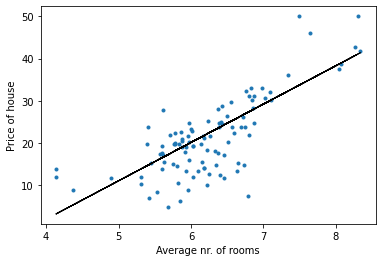

In [ ]:
plt.plot(X_test, y_test, '.')
plt.plot(X_test, y_pred, color='k', linewidth=1)
plt.xlabel('Average nr. of rooms')
plt.ylabel('Price of house')

### Logistic regression

Here we illustrate basic logistic regression using the `sklearn` handwritten digit dataset.

In [ ]:
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

There are ten classes (digits 0 through 9), but for the sake of illustration, we only load in two digits here to do standard binary classification using logistic regression.

In [ ]:
X, y = load_digits(n_class=2, return_X_y=True)

Each image is 8x8 pixels stacked as a 64-dimensional feature vector:

In [ ]:
print(X.shape)

(360, 64)


In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  8.,  1.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

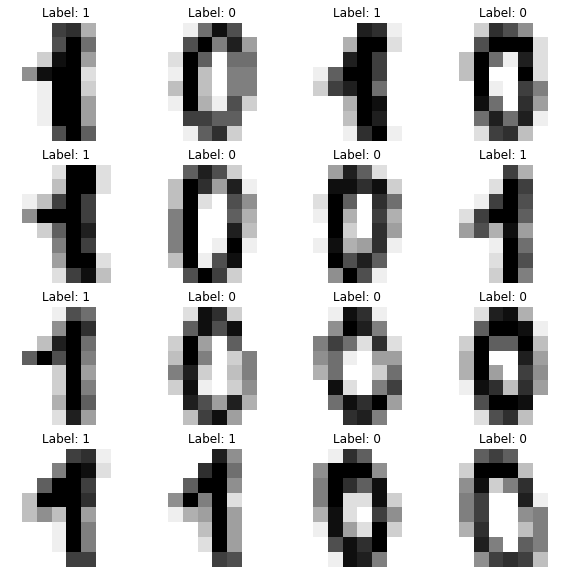

In [ ]:
# Plot some elements of the dataset
plt.figure(figsize=(10,10))
for i in range(1,17):
  plt.subplot(4,4,i)
  X_im = np.reshape(X[i,],[8,8])
  plt.imshow(X_im, cmap=plt.cm.gray_r)
  plt.axis('off')
  plt.title('Label: {}'.format(y[i]))

We again split the dataset into training and test subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True)

Now scale the features to be in the range [0,1]:

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now create the classifier and fit it on the data

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict on the test data and evaluate accuracy

In [ ]:
y_pred = logistic_regression.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on the test dataset: {}'.format(acc))

Accuracy on the test dataset: 1.0


### Support vector machines

Support vector machines can also be used for multi-class classification. Here one implements either a *one-vs-one* approach where a total of `n_classes * (n_classes - 1)/2` classifiers are constructed and each one trained on data from two classes; or one implements a *one-vs-the-rest* strategy, in which case `n_classes` models have to be trained.

Sklearn implements one-vs-one in `svm.SVC` and `svm.NuSVC` and one-vs-rest in `svm.LinearSVC`.

In practice, the one-vs-the-rest strategy is usually preferred as the results are similar but the runtime is significantly less for large number of classes.

We illustrate this multi-class SVM classification here.

In [ ]:
from sklearn import svm

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

As an example we work with the iris dataset, which consists of three different flower types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

This will load in the data as a dictionary. The keys of the dictionary are as follows:


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The features are as follows:

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We extract the data for the SVM classifier:

In [ ]:
X = iris.data 
y = iris.target

We again convert the data into a pandas DataFrame to get some initial statistics:

In [ ]:
df = pd.DataFrame(X)
df.columns = iris.feature_names

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['label'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


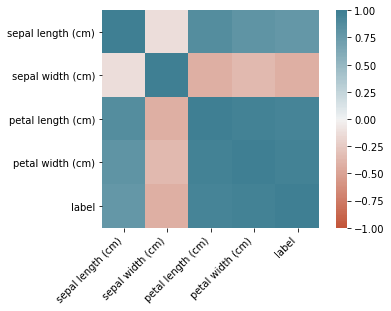

In [ ]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


So let us just pick *petal length* and *petal width* as features:

In [ ]:
features = X[:,2:]
labels = iris.target

Plot the data:

Text(0, 0.5, 'Petal width')

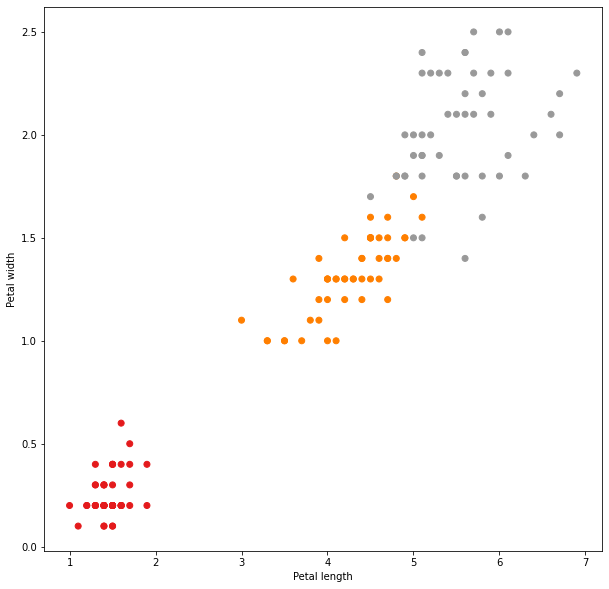

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(features[:,0], features[:,1], c=labels, cmap=plt.cm.Set1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

Split into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, 
                                                    shuffle=True)

Define and fit the SVM:

In [ ]:
svm_iris = svm.SVC(kernel='linear')
svm_iris.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

We can again evaluate the accuracy of the classifier:

In [ ]:
y_pred = svm_iris.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.9666666666666667


To plot the decision boundary, let's use the classifier for all 'grid points' of our feature domain:

Text(0, 0.5, 'Petal width')

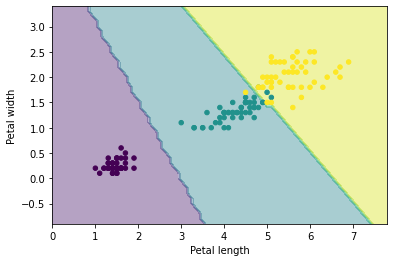

In [ ]:
# Cover our feature domain with artificial data samples
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
feature1, feature2 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = svm_iris.predict(np.column_stack((feature1.flatten(), feature2.flatten())))
Z = Z.reshape(feature1.shape)

plt.contourf(feature1, feature2, Z, alpha=0.4)
plt.scatter(features[:,0], features[:,1], c=labels, s=20)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

### Ensemble methods

Here we show how ensemble methods can boost the classification accuracy for linear SVM classification on the Fashion-MNIST dataset.

We first begin with the base case of a single classifier (see lecture notes):

In [ ]:
from sklearn.datasets import fetch_openml

from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

Scikit-learn allows downloading of larger real-world datasets through their `fetch_` routines. Here we download the Fashion-MNIST dataset from the OpenML repository:

In [ ]:
X, y = fetch_openml('Fashion-MNIST', return_X_y=True)

The original dataset has 70,000 samples, and it is customary to use 60,000 for training and 10,000 for testing:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000,
                                                    test_size=10000)

Visualize some samples from the dataset:

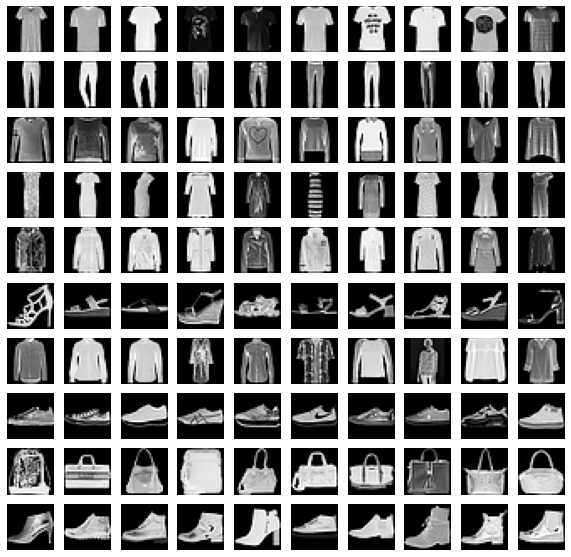

In [ ]:
# Visualize the dataset
k=1
fig = plt.figure(figsize=(10,10))
for i in range(10):
  ind = np.where(y_train==str(i))
  for j in range(10):
    plt.subplot(10,10,k)
    plt.imshow(np.reshape(X_train[ind[0][j]],(28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    k += 1

Maximum pixel value is again 255, and the minimum pixel value is again 0

In [ ]:
print(X_train.min(), X_train.max())

0.0 255.0


As the pixel values of the images range from 0 to 255, we scale them to 0 to 1:

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM as base classifier (we use `LinearSVC` as training on this dataset with `SVC` takes a long time):

In [ ]:
clf = LinearSVC(max_iter=100)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Get the accuracy of the classifier:

In [ ]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data: {}'.format(acc))

Accuracy on test data: 0.8437


We now compare this to a SVM-based bagging classifier:

In [ ]:
from sklearn.ensemble import BaggingClassifier

To keep the computational burden comparable, we train 10 estimators doing 10 optimization steps only (as we used a single classifier using 100 steps above as baseline):

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=LinearSVC(max_iter=10), 
                                n_estimators=10)
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

BaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=10,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
y_pred = bagging_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data: {}'.format(acc))

Accuracy on test data: 0.8421


### Unsupervised learing

Here we apply the k-means clustering algorithm to the iris data set.

In [ ]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
features = X[:,2:]

We do not need the labels for the k-means clustering algorithm. To find the correct number of clusters, we use the silhouette score:

In [ ]:
score = []
for k in range(2,8):
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(features)
  score.append(silhouette_score(features, kmeans.labels_))

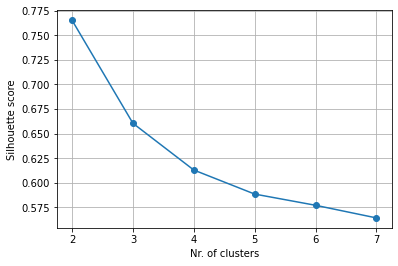

In [ ]:
plt.plot(np.arange(2,8), score,'o-')
plt.xlabel('Nr. of clusters')
plt.ylabel('Silhouette score')
plt.grid()

Interestingly, the silhouette score is highest for 2 clusters! Let's plot the decision boundaries, along with the true labels of the dataset:

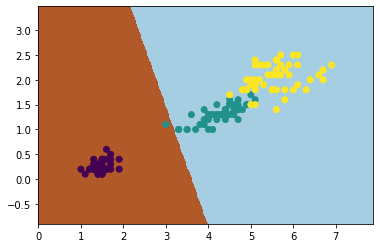

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)

# Evaluate the algorihm at each point of the feature domain
h = 0.02
x_min, x_max = features[:,0].min() - 1, features[:,0].max() + 1
y_min, y_max = features[:,1].min() - 1, features[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.column_stack((xx.flatten(), yy.flatten())))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(features[:,0], features[:,1], c=y)

Besides the silhouette score, there is also the so-called *elbow method* to find the optimal number of clusters.

Here one looks as the elbow of the performance measure of the optimizer as the point of diminishing returns, i.e. as the point where the additional cost is no longer worth it.

For the k-means clustering method, this performance measure (besides the silhouette score) is the `inertia`, which is the sum of squared distances of samples to their closest cluster center.

In [ ]:
inertia = []
for k in range(1,8):
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(features)
  inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia score')

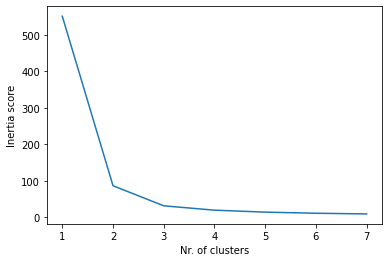

In [ ]:
plt.plot(np.arange(1,8), inertia)
plt.xlabel('Nr. of clusters')
plt.ylabel('Inertia score')

The elbow method does yield the optimal number of clusters to be k=3, which is where the elbow of the curve lies!